```
further: 
scaler.fit(), scaler.fit_transform(), get X_scalered with pipeline, scalar and scaler 
clf.support_vectors_, loss='hinge'
```

```
1. Linear SVM Classification 
2. Nonlinear SVM Classification 
3. SVM Regression 
4. Under the Hood
```

## 1. SVM Classification: Linear 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')

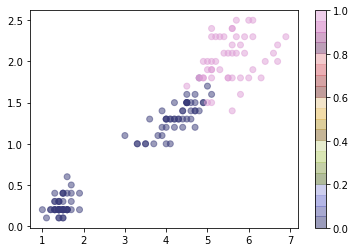

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris['data'][:, 2:]
y = iris['target']
y_2 = (y == 2).astype('int')

plt.scatter(X[:, 0], X[:, 1], c=y_2, cmap='tab20b', alpha=0.5)
plt.colorbar()
plt.show()

##'setosa', 'versicolor', 'virginica'
## petal length, petal widt

In [3]:
## svc = SVC(kernel='linear'), svc.support_vectors_
## svc = LinearSVC(), no 

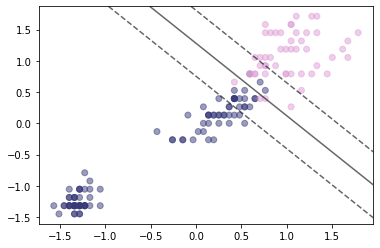

In [4]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

scaler_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=10, loss='hinge') )
])

scaler = StandardScaler()
X_scalered = scaler.fit_transform(X)
linear_svc = SVC(kernel='linear', C=10)
linear_svc.fit(X_scalered, y_2)

plt.scatter(X_scalered[:, 0], X_scalered[:, 1], c=y_2, cmap='tab20b', alpha=0.5)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 50) 
yy = np.linspace(ylim[0], ylim[1], 50) 
XX, YY = np.meshgrid(xx, yy)
xy = np.c_[XX.ravel(), YY.ravel()]
Z = linear_svc.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, levels=[-2, 0, 2], 
           colors='k', alpha=0.6,  linestyles=['--', '-', '--'])
plt.show()
## np.c_: add column, np.vstack().T: stack vertically

## 2. SVM Classification: Nonlinear(Polynomial)

In [5]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
X, y = make_moons(noise=0.15)
X.shape, y.shape
## a simple toy dataset: default n_samples = 100, noise = 0

((100, 2), (100,))

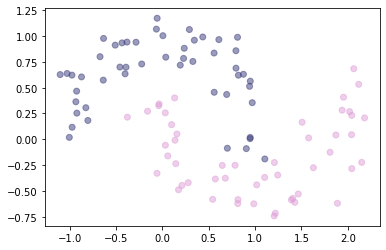

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='tab20b', alpha=0.5)
plt.show()

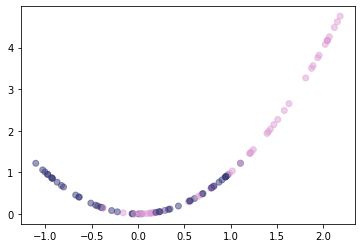

In [7]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
plt.scatter(X_poly[:, 0], X_poly[:, 2], c=y, cmap='tab20b', alpha=0.5)
plt.show()

In [8]:
poly_svc = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=10, loss='hinge'))
])

In [9]:
poly_kernel_svc = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_svc', SVC(kernel='poly', degree=3, C=10, coef0=1))
])

In [10]:
## similarity features 
## add new features to seperate data

## rbf kernel: guassian radial basis function 

## string kernel: for DNA sequences or text documents 

In [11]:
rbf_kernel_scv = Pipeline([
    ('scaler', StandardScaler()),
    ('rbf_svc', SVC(kernel='rbf', C=0.001, gamma=5))
])

## 3. SVM Regression

In [12]:
## SVM for outlier detection 

## 4. Under the Hood